In [2]:
%matplotlib inline

import pandas as pd

In [4]:
titles = pd.read_csv('titles.csv', index_col=None)

titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


# 1. Using groupby(), plot the number of films that have been released each decade in the history of cinema.

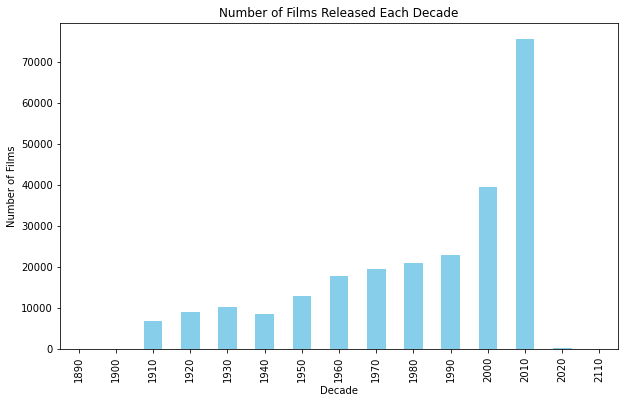

In [9]:
# Assuming 'release_year' is the column name containing release years in the 'titles' DataFrame
# If it's named differently, please replace it with the correct column name
titles['decade'] = (titles['year'] // 10) * 10

# Group by decade and count the number of films
films_per_decade = titles.groupby('decade').size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.show()


# 2 Use groupby() to plot the number of "Hamlet" films made each decade.


<ipython-input-12-413cf11425ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


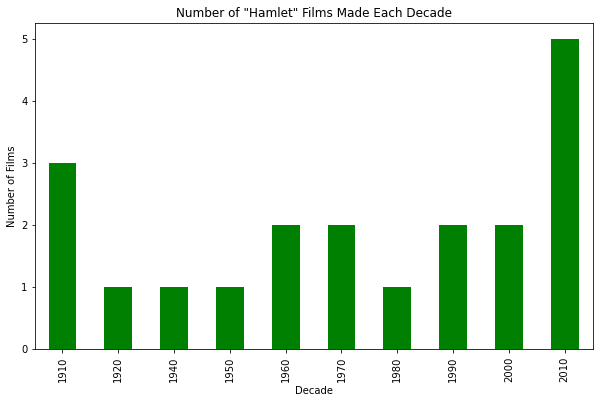

In [12]:
# Filter the DataFrame for films with the title "Hamlet"
hamlet_films = titles[titles['title'] == 'Hamlet']

# Assuming 'release_year' is the column name containing release years
# If it's named differently, please replace it with the correct column name
hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

# Group by decade and count the number of "Hamlet" films
hamlet_films_per_decade = hamlet_films.groupby('decade').size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hamlet_films_per_decade.plot(kind='bar', color='green')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.show()


In [14]:
cast = pd.read_csv('cast.csv', index_col=None)

cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 3. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [16]:
# Step 1: Filter roles from the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Step 2: Filter for leading roles
leading_roles = roles_1950s[roles_1950s['n'] == 1]

# Step 3: Group by year and gender
roles_by_year_gender = leading_roles.groupby(['year', 'type'])

# Step 4: Count the number of roles for each combination of year and gender
roles_count = roles_by_year_gender.size()

# Display the result
print(roles_count)


year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64


# 4.  In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [17]:
# Step 1: Filter roles from the 1950s
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Step 2: Filter for roles with n values between 1 and 5
filtered_roles = roles_1950s[(roles_1950s['n'] >= 1) & (roles_1950s['n'] <= 5)]

# Step 3: Group by gender and n value
roles_by_gender_n = filtered_roles.groupby(['type', 'n'])

# Step 4: Count the number of roles for each combination of gender and n value
roles_count = roles_by_gender_n.size()

# Display the result
print(roles_count)


type     n  
actor    1.0    6692
         2.0    4640
         3.0    5654
         4.0    5663
         5.0    5674
actress  1.0    3040
         2.0    4635
         3.0    3201
         4.0    2881
         5.0    2592
dtype: int64


# 5. Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [18]:
# Step 1: Filter roles from Pink Panther movies
pink_panther_roles = cast[cast['title'].str.contains('Pink Panther', case=False)]

# Step 2: Group by movie title
roles_by_movie = pink_panther_roles.groupby('title')

# Step 3: Count the number of roles for each movie
roles_count = roles_by_movie.size()

# Display the result
print(roles_count)


title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64


# 6. List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [19]:
# Step 1: Filter roles for Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Step 2: Group by title and year, and count the number of roles
roles_per_film = frank_oz_roles.groupby(['title', 'year']).size()

# Step 3: Filter films where Frank Oz played more than one role
multiple_roles_films = roles_per_film[roles_per_film > 1]

# Display the result
print(multiple_roles_films)


title                                 year
An American Werewolf in London        1981    2
Follow That Bird                      1985    3
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
The Dark Crystal                      1982    2
The Great Muppet Caper                1981    6
The Muppet Christmas Carol            1992    7
The Muppet Movie                      1979    8
The Muppets Take Manhattan            1984    7
dtype: int64


# 7. List each of the characters that Frank Oz has portrayed at least twice

In [20]:
# Step 1: Filter roles for Frank Oz
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

# Step 2: Group by character name and count the number of times each character appears
character_appearances = frank_oz_roles.groupby('character').size()

# Step 3: Filter characters that Frank Oz has portrayed at least twice
characters_at_least_twice = character_appearances[character_appearances >= 2]

# Display the result
print(characters_at_least_twice)


character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64
